In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.isna().sum() #check null values

Hours     0
Scores    0
dtype: int64

In [7]:
def grades(scores):
    if scores >=75:
        return "A"
    elif scores >=60 and scores < 75:
        return "B"
    elif scores >= 35 and scores < 60:
        return "C"
    else:
        return "D"

In [8]:
df['Grades'] = df["Scores"].apply(grades)

In [9]:
df.head()

,Hours,Scores,Grades
0,2.5,21,D
1,5.1,47,C
2,3.2,27,D
3,8.5,75,A
4,3.5,30,D


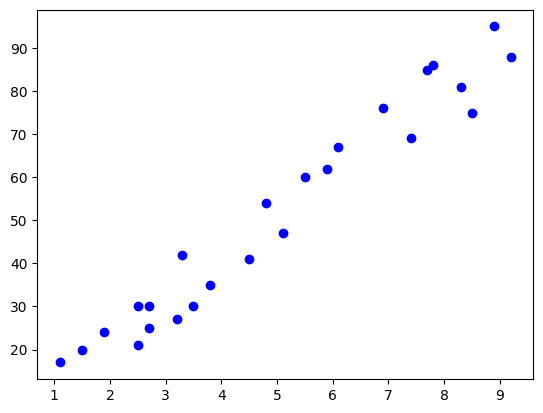

In [10]:
plt.scatter(df["Hours"],df["Scores"],color="blue")
plt.show()

In [11]:
x=df[['Hours']]
y=df[['Scores']]

In [14]:
#split into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
len(xtrain),len(ytrain),len(xtest),len(ytest)

(20, 20, 5, 5)

In [17]:
linreg= LinearRegression()

In [18]:
linreg.fit(xtrain,ytrain) #train the model

LinearRegression()

In [19]:
ypred = linreg.predict(xtest)
ypred

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

In [21]:
ytest

,Scores
14,17
13,42
17,24
3,75
21,54


In [22]:
xpred = linreg.predict(xtrain)
xpred

array([[79.01357653],
       [62.27580326],
       [75.87524404],
       [35.0769217 ],
       [31.93858921],
       [26.70803506],
       [94.70523897],
       [55.99913828],
       [38.21525418],
       [51.81469497],
       [24.6158134 ],
       [24.6158134 ],
       [91.56690648],
       [80.05968736],
       [70.64468989],
       [26.70803506],
       [85.29024151],
       [45.53802999],
       [60.1835816 ],
       [14.15470511]])

In [23]:
ytrain

,Scores
10,85
18,67
19,69
4,30
2,27
20,30
6,88
7,60
22,35
1,47


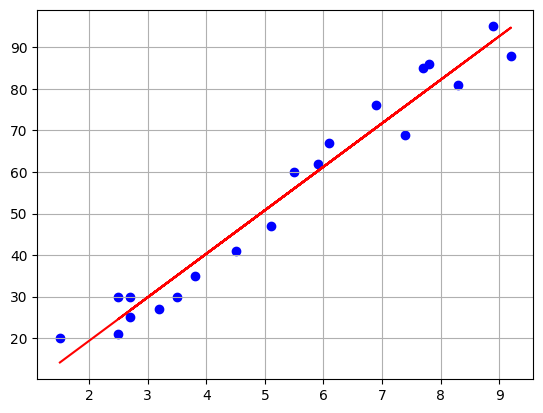

In [24]:
plt.scatter(xtrain,ytrain,color="blue")
plt.plot(xtrain,xpred,color="red")
plt.grid()
plt.show()

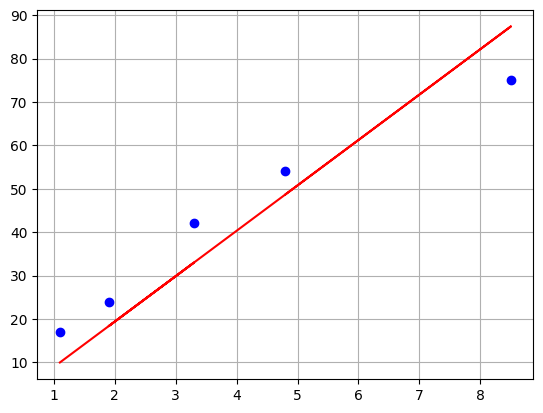

In [25]:
plt.scatter(xtest,ytest,color="blue")
plt.plot(xtest,ypred,color="red")
plt.grid()
plt.show()

In [26]:
mae = mean_absolute_error(ytest,ypred)
mae

7.882398086270432

In [27]:
mse = mean_squared_error(ytest,ypred)
mse

68.88092074277635

In [28]:
r2=r2_score(ytest,ypred)
r2

0.8421031525243527